### Advanced function
- Duplicate to 3 lions
- Give them seperate colors
- Give each lion a gradient color effect (choose horizontal or vertical)
- Give each lion a sine wave effect
- Bonus, copy more of these 3 lions and put them in a circle, each rotated a bit

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

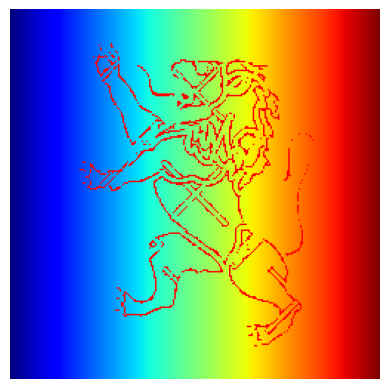

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load and Process Image
image = Image.open("Belgium_lion.png").convert('RGB') 
image = image.resize((250, 250))
image_array = np.array(image)

# Step 2: Create Masks for Lion and Background
lion_mask = (image_array == 0).all(axis=-1)   # Mask for black lion
background_mask = (image_array == 255).all(axis=-1)  # Mask for white background

# Step 3: Colorize the Lion
colored_lion = np.zeros_like(image_array)

# Choose lion color (Red, Green, or Blue)
lion_color = [255, 0, 0]  # Red Lion
# lion_color = [0, 255, 0]  # Green Lion
# lion_color = [0, 0, 255]  # Blue Lion

# Apply lion color
colored_lion[lion_mask] = lion_color

# Step 4: Create Colormap Background
gradient = np.linspace(0, 255, image_array.shape[1])  # Create a horizontal gradient
gradient_background = np.tile(gradient, (image_array.shape[0], 1))  # Expand to 250x250

# Normalize to range [0, 1] for colormap
gradient_norm = gradient_background / 255.0

# Choose a colormap (e.g., 'jet', 'viridis', 'plasma', 'coolwarm')
colormap = plt.get_cmap('jet')

# Convert colormap to RGB (float 0-1 → int 0-255)
background_colored = (colormap(gradient_norm)[:, :, :3] * 255).astype(np.uint8)

# Step 5: Merge Lion with Background
final_image = background_colored.copy()  # Start with colored background
final_image[lion_mask] = colored_lion[lion_mask]  # Place colored lion on background

# Step 6: Display Final Image
plt.imshow(final_image)
plt.axis("off")
plt.show()


#### Create 3 lions


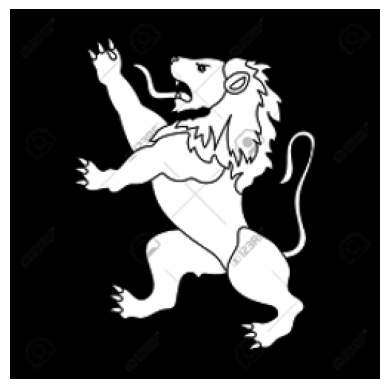

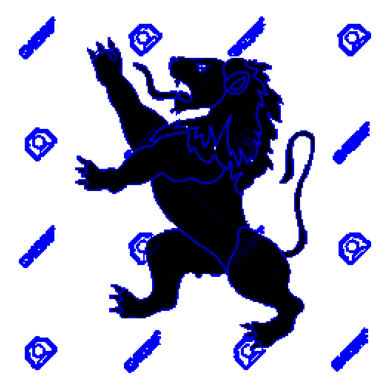

In [20]:
image = Image.open("Belgium_lion.png").convert('RGB') 
image = image.resize((250,250))
image_array = np.array(image)
inverted_image = 255 - image_array  # Inverts all colors


# Display the image
plt.imshow(inverted_image)
plt.axis("off")  # Hide axes
plt.show()


# Create separate lions with different colors
red_lion = inverted_image.copy()
blue_lion = image_array.copy()
green_lion = image_array.copy()

white_mask = (image_array == 255).all(axis=-1)

red_lion[:, :, 1] = 0  # remove green channel
red_lion[:, :, 2] = 0  # remove blue channel

blue_lion[:, :, 0] = 0  # remove red channel
blue_lion[:, :, 1] = 0  # remove green channel

green_lion[:, :, 0] = 0  # remove red channel
green_lion[:, :, 2] = 0  # remove blue channel

blue_lion[white_mask] = [255, 255, 255]

# Display the image
plt.imshow(blue_lion)
plt.axis("off")  # Hide axes
plt.show()

#### Gradient functie

In [3]:
def gradient(image, plane='horizontal'):
    #For each lion, start with base color left and at more blue going to the right => horizontal gradient
    #For each lion, start with base color top and at more green going down => vertical gradient

    #gradient = ... 

    # Via for loop
    if plane == 'horizontal':
        for i in range(height):
            for j in range(width):
                if image == red_lion:
                    gradient[i, j, 0] = 255 #rood blijft constant
                    gradient[i, j, 2] = np.round((j/width) * 255)

                elif image == blue_lion:
                    gradient[i, j, 2] = np.round((j/width) * 255)

                elif image == green_lion:
                    gradient[i, j, 1] = 255 #groen blijft constant
                    gradient[i, j, 2] = np.round((j/width) * 255)

    if plane == 'vertical':
        # code verticaal groene verschuiving

    # Via gevectoriseerde methode
    np.linspace(0, 255, width) # geeft matrix met getallen 0 tot 255 verdeeld over breedte
    np.tile(height, 1) #zal linspace matrix over alle rijen herhalen
    np.round() # linspace nog afronden

    
    return gradient


# image_array[i, j] = [255, 45, 99]


IndentationError: expected an indented block after 'if' statement on line 22 (2549451506.py, line 26)

### Sine wave functie

In [18]:
def sine_distortion(image, c=10, p=0.5):
    """
    Applies a sine wave distortion to an image.
    
    Parameters:
        image (numpy.ndarray): Input image as a NumPy array.
        c (float): Controls the intensity of the distortion.
        p (float): Determines the balance between linear and sine transformation.
        
    Returns:
        numpy.ndarray: The distorted image.
    """
    height, width, channels = image.shape

    # Generate coordinate grids
    x_coords = np.tile(np.arange(width), (height, 1))  # Width x Height array
    y_coords = np.tile(np.arange(height), (width, 1)).T  # Transposed to match image shape

    # Apply the sine transformation to y-coordinates
    transformed_y = c * (p * x_coords + (1 - p) * np.abs(np.sin(x_coords) - y_coords))

    # Clip to ensure values stay within valid image bounds
    transformed_y = np.clip(transformed_y.astype(int), 0, height - 1)

    # Create an empty image for the distorted result
    distorted_image = np.zeros_like(image)

    # Map pixel values from the original image to the distorted image
    for channel in range(channels):
        distorted_image[:, :, channel] = image[transformed_y, x_coords, channel]

    return distorted_image.astype(np.uint8)



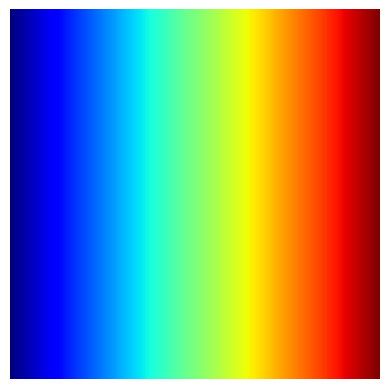

In [22]:
distorted_image = sine_distortion(final_image)

# Display the image
plt.imshow(distorted_image)
plt.axis("off")  # Hide axes
plt.show()



#### Lions in circle

In [ ]:
def lions_in_circle():
    return

### Code from Ifeyinwa

Text(0.5, 1.0, 'Belgian Flag with Lion symbol')

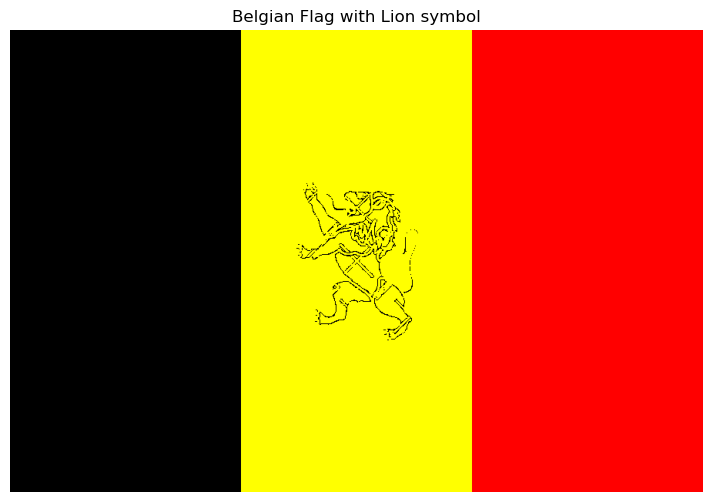

In [14]:
image = Image.open("Belgium_lion.png").convert('RGB') 
image = image.resize((250,250))
image_array = np.array(image)

#creating flag with 3 stripes
flag_height =600
flag_width =900
stripe_width = flag_width // 3

#creating base flag array
flag = np.zeros((flag_height,flag_width,3),dtype= np.uint8) #3 colors , each color value is from 0 to 255

#first black stripe
flag[:,0:stripe_width] = [0,0,0]   #no red,no green,no blue

#middle_strip, yellow stripe
flag[:, stripe_width:2*stripe_width] = [255,255,0] #pay attention to the slices

#last red stripe
flag[:, 2*stripe_width:] = [255,0,0]

# to get the lion location on the flag
lion_y = (flag_height - image_array.shape[0]) // 2 #to get how far from up
lion_x = stripe_width + (stripe_width -image_array.shape[1]) // 2

lion_shape = (image_array == [0,0,0]).all(axis =2 ) # checks if RGB is black,checks if the conditions are true and return True if all pixel are black

flag[lion_y:lion_y + image_array.shape[0],lion_x:lion_x + image_array.shape[1]][lion_shape] = [0,0,0]

plt.figure(figsize=(10,6))
plt.imshow(flag)
plt.axis('off')
plt.title('Belgian Flag with Lion symbol')
